# 2  H SAF Root-zone Soil wetness index products
## 2.1  Overview

The root-zone soil wetness index (SWI) products are available in Near Real-Time (NRT) or as Climate Data Record (CDR) daily products. The main difference between the two product groups is that, NRT RSM is available within 12-36 hours (typically < 24 hours) of the analysis time. The CDR RSM represents a consistent long-term data record, which is updated annually (currently 1992-2016). The following table summarises the different products:   

<h2 style='padding: 10px'>NRT and data record RSM products</h2><table class='table table-striped'> <thead> <tr> <th>Product name</th> <th>Type</th> <th>Period</th> <th>Obs assimilated</th> <th>DA system</th> <th>Resolution</th> <th>QC flags</th> </tr> </thead> <tbody> <tr> <th scope='row'>H14</th> <td>NRT</td> <td>2012 onwards</td> <td> 25 km sampled ASCAT-A/B SSM products (H102/H103) </td> <td> Regular updates of ECMWF LDAS (38R1-46R1) </td> <td> 25 km </td> <th> Yes since 4/10/18 (1=normal, 2=frozen risk, 3=outide nominal range)  </th> </tr> <tr> <th scope='row'>H27</th> <td>Data record</td> <td>1992-2014</td> <td> ERS 1/2 (1992-2006) and ASCAT-A (2007-2014) reprocessed SSM </td> <td> 41R1 of ECMWF LDAS </td>  <td>16 km</td> <th> None  </th> </tr> <tr> <th scope='row'>H140</th> <td>Data record</td> <td>2015-2016</td> <td> ASCAT-A (2015-2016) reprocessed SSM </td> <td> 43R3 of ECMWF LDAS </td>  <td>16 km</td> <th> None  </th> </tr> </tbody> </table>

Both NRT and data record products are provided in grib format on reduced Gaussian grids. Using python software such as metview-python or pygrib, it is possible to read in and plot the grib data directly. We will demonstrate examples using metview-python. For some purposes it is useful to convert the reduced Gaussian to regular lat/lon and from grib format to netCDF format. This can be done using various software, such as NCAR command language (NCL) and climate data operators (CDO). We will also demonstrate a simple example for this conversion.


## 2.1  Requirements:
- python version 3.6
- The following libraries: metview, pandas, pylab, matplotlib, numpy, cartopy
- A miniconda script has been provided on github, which sets up a local environment and downloads the relevant libraries for all the soil moisture examples: 
https://github.com/H-SAF/eumetrain_sm_week_2019
- The miniconda script can be run in linux or mac
- The metview-python package is documented on github (with examples):
https://github.com/ecmwf/metview-python






## 2.2  Downloading and visualizing the H14 NRT root-zone soil wetness index product and the H27 data record product
In this exercise we will

-  Downloading the grib files from H SAF ftp
-  Reading the data in python
-  Plotting the data in python
-  Producing regular lat/lon netCDF files over a particular region






### 2.2.1 Downloading the grib files from H SAF ftp
In order to access the H SAF ftp you will need to register:
http://hsaf.meteoam.it/user-registration.php
You will then be given a username and password for reading data from the H SAF ftp. For easy access and download from the ftp is it best to use software such as filezilla (https://filezilla-project.org/). Alternatively, to download example file (H14 for 30/05/2018) from the terminal type:

ftp user@ftphsaf.meteoam.it

password: (type your password)

cd /products/h14/h14_cur_mon_grib

get h14_20190530_0000.grib.bz2

exit

bzip2 -d h14_20190530_0000.grib.bz2

### 2.2.2 Producing a global plot of H14 in metview-python

In [1]:
import metview as mv #for reading and plotting grib files
import numpy as np #for grid/data manipulation
import matplotlib.pyplot as plt #For plotting figures



In [2]:
SM =mv.read("h14_2019053000.grib") #Read in grib data for 30/5/2019:

SWI1=mv.read(data=SM,param="40.228") #1st layer (0-7 cm depth)
SWI2=mv.read(data=SM,param="41.228") #2nd layer (7-28 cm depth)
SWI3=mv.read(data=SM,param="42.228") #3rd layer (28-100 cm depth)
SWI4=mv.read(data=SM,param="43.228") #4th layer (100-289 cm)
qc=mv.read(data=SM,param="200.228") #Quality control flag (1=normal, 2=risk of frozen conditions, 
#3=outside nominal range)

RZSM = SWI1 
#Extract root-zone SM values from depth integrating the 4 layers
RZSM = RZSM.set_values(SWI1.values()*0.07 + SWI2.values()*0.21 + SWI3.values()*0.72)

In [3]:
#Create contouring for metview plot
cont_pc = mv.mcont(contour = "off",  
          legend = "on",
          contour_shade = "on",
          contour_level_selection_type = "level_list",
          contour_level_list = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0],
          contour_label_format = "(F4.1)",
          contour_label = "off",
          contour_label_height = 0.40,
          contour_label_colour = "charcoal",
          contour_label_frequency = 10,
          contour_highlight              = "off",
          contour_shade_method = "area_fill",
          contour_shade_colour_method = "gradients",
          contour_gradients_colour_list = ['burgundy','red','orange','yellow','green','cyan','sky','blue','navy'],
          contour_gradients_step_list = [20,20,20,20,20,20,20,20])

In [4]:
#Create legend:
my_legend = mv.mlegend(legend_display_type = "continuous",
                 legend_entry_border='off',
                 legend_text_colour = "charcoal",
                 legend_values_list= [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
                 legend_text_composition = 'user_text_only',
                 legend_text_font_size = 1,
                 legend_user_maximum = "on",
)


In [5]:
# shaded land to make the points stand out more
grey_land_shading = mv.mcoast(
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "grey",
    map_grid_latitude_increment     = 40,
    map_grid_longitude_increment    = 80,
    map_grid_colour                 = "charcoal",
    map_grid = "off",
    map_label = "off")

In [6]:
#Extract global domain [upper lon, lower lon, upper lat, lower lat]
area_view = mv.geoview(
    map_area_definition = 'corners',
    area = [-89,-179,89,179],
    coastlines = grey_land_shading
)

In [7]:
#Create title
title = mv.mtext(text_lines = ["<font size='1'>H14 root-zone SWI</font>","",
          "<grib_info id='z500' key='name' format='%s'/> <grib_info id='z500' key='level' format=' at %s hPa'/>"],
          text_justification = "centre",
          text_font_size = 0.5,
          text_colour = "charcoal")

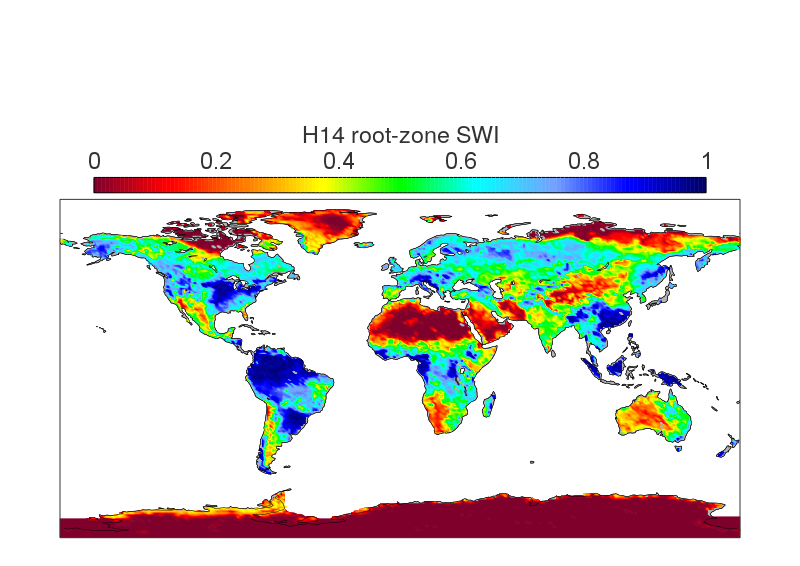

In [8]:
#Create plot
mv.setoutput('jupyter')
#mv.setoutput(mv.png_output(output_name = 'H14_SWI_20181231')) # To save as png image
dw = mv.plot_superpage(pages = mv.mvl_regular_layout(area_view,1,1,1,1))
mv.plot(dw[0], RZSM, cont_pc, my_legend,title)

In [11]:
#Mask suspect data
masked_data=RZSM.values(); np.warnings.filterwarnings('ignore'); masked_data[qc.values()>1.0]=np.nan
RZSM = RZSM.set_values(masked_data)


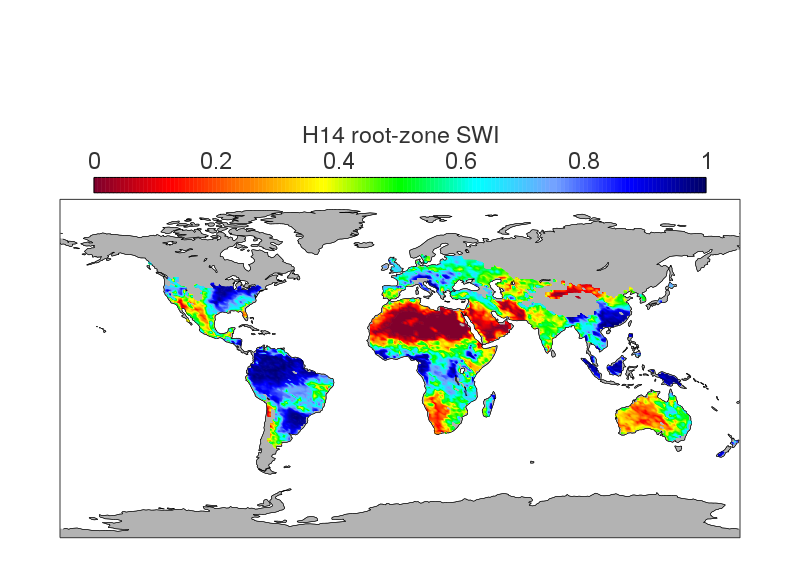

In [12]:
dw = mv.plot_superpage(pages = mv.mvl_regular_layout(area_view,1,1,1,1))
mv.plot(dw[0], RZSM, cont_pc, my_legend,title) #Plot masked data

### 2.2.4 Converting to regular lat-lon 

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import metview as mv

filename='h14_2019053000.grib'
SM = mv.read(filename)

SM1 = mv.read(data=SM,param='40.228') #1st layer (0-7 cm depth)
SM2 = mv.read(data=SM,param='41.228') #2nd layer (7-28 cm depth)
SM3 = mv.read(data=SM,param='42.228') #3rd layer (28-100 cm depth)

RZSM = SM1
RZSM = RZSM.set_values(SM1.values()*0.07 + SM2.values()*0.21 + SM3.values()*0.72) #Depth integration for RZSM

RZSM_ll = mv.read(data=RZSM,grid=[0.25,0.25]) #Convert grid to regular lat-lon of 0.25 degrees by 0.25 degrees


### 2.2.4 Plot regular gridded data with cartopy

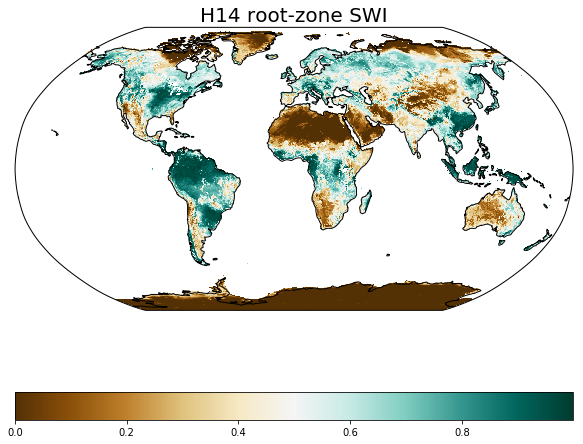

In [14]:
[[Nj,Ni]] = mv.grib_get(RZSM_ll,['Nj','Ni']) #Extract number of points in lat/lon
Nj=int(Nj)
Ni=int(Ni)

fig = plt.figure(figsize=(10, 10))
cmap=plt.cm.get_cmap('BrBG') #Choose colour map type 
RZSM_np = RZSM_ll.values().reshape(Nj,Ni)
ax = plt.axes(projection=ccrs.Robinson()) #Choose projection
ax.coastlines() 
#Plot image with cartopy:
im = ax.imshow(RZSM_np,origin='upper',cmap=cmap,extent=[0.00001,360.,-90,90],transform=ccrs.PlateCarree())  
plt.gcf().colorbar(im,ax=ax,orientation='horizontal'); plt.title("H14 root-zone SWI",fontsize=20)
#plt.savefig('Cartopy_plot.png',dpi=300,layout='tight') #To save in png format
plt.show()
plt.close()

### 2.2.3 Producing a time series of area-averaged root-zone SM over Europe

Firstly, we will read in grib files for the soil moisture data records covering the period of interest 
In this example, we will need h27 grib files for 2001-2010

In [15]:
import metview as mv #for reading and plotting grib files
import numpy as np #for grid/data manipulation
import pandas as pd #Needed for time series
import pylab as pl #mainly for plotting

analysis_period = ['2001-01-01','2010-12-31'] 

data_range = pd.date_range(analysis_period[0], analysis_period[1]) 

area = [30,-10.87,60,30] #Europe domain with which to integrate [upper lon, lower lon, upper lat, lower lat]


SM_df_layer=pd.DataFrame(pl.empty((data_range.size),data_range)) #Pandas dataframe for time series

In [ ]:
for days, d in zip(data_range,range(len(data_range))): #Loop over days in time series:

  SM = mv.read("/h27_"+str(days.year)+'%02d'%(days.month)+'%02d'%(days.day)+'00.grib') 

  SM1 = mv.read(data=SM,param='40.228') #1st layer (0-7 cm depth)
  SM2 = mv.read(data=SM,param='41.228') #2nd layer (7-28 cm depth)
  SM3 = mv.read(data=SM,param='42.228') #3rd layer (28-100 cm depth)

  SM1_layer = mv.integrate(SM1, area) #Average soil moisture over European domain
  SM2_layer = mv.integrate(SM2, area) 
  SM3_layer = mv.integrate(SM3, area) 

  SM_df_layer.iloc[d] = (SM1_layer*0.07)+(SM2_layer*0.21)+(SM3_layer*0.72) #Depth integrated SWI


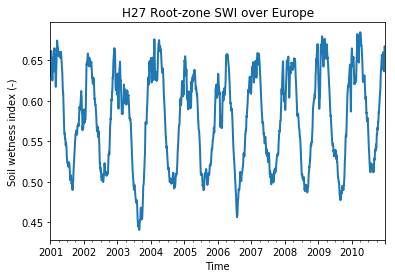

In [73]:
#Plot time series    
SM_df_layer.index=data_range
SM_df_layer.iloc[:].plot(legend='False',linewidth=2.0)
pl.gca().get_legend().remove()
pl.xlabel('Time'); pl.ylabel('Soil wetness index (-)'); pl.title('H27 Root-zone SWI over Europe'); 
pl.savefig('H27_time_series.png',dpi=300,layout='tight')


In [189]:
#To plot a time series for a particular gridpoint, simply use the "nearest_gridpoint" function 
SM1_point = mv.nearest_gridpoint(SWI1, [60, 16]) #Value of SM1 at nearest point to 60 degrees East, 16 North
print(SM_1_point)

0.5507599115371704


### 2.2.4 Producing regular lat/lon netCDF files over a particular region

- The following examples use the CDO tool, which is free to download from:
https://code.mpimet.mpg.de/projects/cdo

- In the terminal, we will convert the grib file from reduced Gaussian to regular lat/lon. In order to this we need to know the number of regular latitude points correspoding to the linear reduced Gaussian grid (T799~N400), which can be found at:
https://www.ecmwf.int/en/forecasts/documentation-and-support/gaussian_n400

Given there are 1600 regular latitude points (and 800 longitude points), we can convert our reduced Gaussian grid to regular lat/lon:

module load cdo

#To convert to regular lat/lon  
cdo -R remapcon,r1600x800 -setgridtype,regular h14_2019053000.grib h14_2019053000_r.grib

#Then convert the file from grib to netcdf:

cdo -f nc copy h14_2019053000_r.grib h14_2019053000.nc 

#Then extract the Italian domain from the global netcdf file (lon0=5, lon1=19, lat0=36, lat1=48):

cdo -sellonlatbox,5,19,36,48 h14_2019053000.nc h14_2019053000_Italy.nc

#Note that the size of the file is vastly reduced (h14_2019053000.nc ~ 25 mb, h14_2019053000_Italy.nc ~ 70 kb)!

#Size of netCDF files can be further reduced by compression e.g.
cdo -f nc4c -z zip_6 copy h14_2019053000_r.grib h14_2019053000_compressed.nc


### Regional plot of netCDF data with cartopy


In [74]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import metview as mv
from netCDF4 import Dataset

(1, 53, 62)


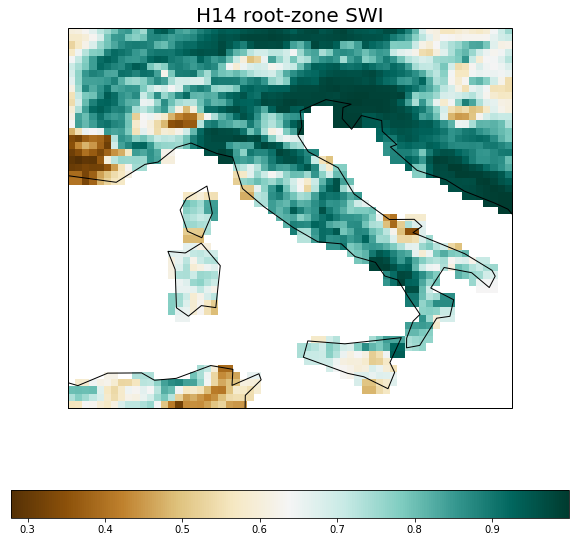

In [78]:
SM="h14_2019053000_Italy.nc"
SM_data=Dataset(SM)

lon=SM_data.variables["lon"][:] #Read in lon coordinates
lat=SM_data.variables["lat"][:] #Read in lat coordinates

SWI_l1=SM_data.variables["var40"][:] #1st layer (0-7 cm depth)
SWI_l2=SM_data.variables["var41"][:] #2nd layer (7-28 cm depth)
SWI_l3=SM_data.variables["var42"][:] #3rd layer (28-100 cm depth)
SWI_l4=SM_data.variables["var43"][:] #4th layer (100-289 cm)

SWI_RZ=(SWI_l1*0.07) + (SWI_l2*0.21) + (SWI_l3*0.72) #Depth integrated SWI
print (np.shape(SWI_RZ)) 

fig = plt.figure(figsize=(10, 10))

cmap=plt.cm.get_cmap('BrBG') 

ax = plt.axes(projection=ccrs.PlateCarree())
im = ax.imshow(SWI_RZ[0],cmap=cmap,extent=[5,19,36,48])
plt.gcf().colorbar(im,ax=ax,orientation='horizontal'); plt.title("H14 root-zone SWI",fontsize=20)
ax.coastlines()
plt.savefig('regional_netCDF.png',dpi=300,layout='tight')


### 2.3.5 Summary

- There are 3 different root-zone SWI products:
    - H14: Global near-real-time 25 km resolution
    - H27: Global data record (1992-2014)
    - H140: Global data record (2015-2016)
- The metview library directly reads and plots grib data from its original non-Gaussian grid
- The CDO tool can convert grib files to regular grids in netCDF format and extract local regions
- Cartopy is a good alternative to metview for plotting regular grids
    